# Creating a Investment and Trading Web App
## Using PyTorch and SageMaker

_Deep Learning Nanodegree Program | Deployment_

---

In [188]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from keras.preprocessing.sequence import TimeseriesGenerator
import warnings

In [189]:
!wget https://investment-and-trading-udacity.s3-us-west-2.amazonaws.com/JPM+2009-2019.csv -O ../data/raw/JPM+2009-2019.csv

--2019-08-03 20:02:30--  https://investment-and-trading-udacity.s3-us-west-2.amazonaws.com/JPM+2009-2019.csv
Resolving investment-and-trading-udacity.s3-us-west-2.amazonaws.com (investment-and-trading-udacity.s3-us-west-2.amazonaws.com)... 52.218.128.133
Connecting to investment-and-trading-udacity.s3-us-west-2.amazonaws.com (investment-and-trading-udacity.s3-us-west-2.amazonaws.com)|52.218.128.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187676 (183K) [text/csv]
Saving to: ‘../data/raw/JPM+2009-2019.csv’

../data/raw/JPM+200 100%[===================>] 183.28K   874KB/s    in 0.2s    

2019-08-03 20:02:31 (874 KB/s) - ‘../data/raw/JPM+2009-2019.csv’ saved [187676/187676]



In [190]:
pd.options.display.float_format = '{:,.3f}'.format
warnings.filterwarnings('ignore')

In [191]:
# import wget
# output_path = '../data/raw/'
# url = 'https://investment-and-trading-udacity.s3-us-west-2.amazonaws.com/JPM 2009-2019.csv'
# filename = wget.download(url, out = output_path)

In [192]:
stock_data = pd.read_csv('../data/raw/JPM+2009-2019.csv') 

In [193]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 7 columns):
Date         2654 non-null object
Open         2654 non-null float64
High         2654 non-null float64
Low          2654 non-null float64
Close        2654 non-null float64
Adj Close    2654 non-null float64
Volume       2654 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 145.2+ KB


In [194]:
stock_data.shape

(2654, 7)

In [195]:
stock_data.head()

Date   Open   High    Low  Close  Adj Close    Volume
0  2009-01-02 31.190 31.640 30.470 31.350     24.564  32494900
1  2009-01-05 30.730 30.770 29.080 29.250     22.919  44069400
2  2009-01-06 29.790 30.420 29.510 29.880     23.412  44216300
3  2009-01-07 29.150 29.400 28.000 28.090     22.010  42156500
4  2009-01-08 27.900 27.950 26.860 27.220     21.328  52075800

In [196]:
stock_data.describe()

Open      High       Low     Close  Adj Close          Volume
count 2,654.000 2,654.000 2,654.000 2,654.000  2,654.000       2,654.000
mean     62.128    62.719    61.529    62.134     55.723  26,770,442.200
std      25.796    25.911    25.694    25.793     27.438  21,861,503.663
min      15.370    17.290    14.960    15.900     12.458   3,680,000.000
25%      41.500    41.942    41.032    41.535     33.327  13,436,550.000
50%      56.615    56.995    56.140    56.670     49.270  19,304,750.000
75%      78.750    79.440    78.297    79.250     73.618  32,481,600.000
max     119.130   119.330   118.080   118.770    115.304 217,294,200.000

In [197]:
stock_data = stock_data.sort_values('Date')
stock_data.head()

Date   Open   High    Low  Close  Adj Close    Volume
0  2009-01-02 31.190 31.640 30.470 31.350     24.564  32494900
1  2009-01-05 30.730 30.770 29.080 29.250     22.919  44069400
2  2009-01-06 29.790 30.420 29.510 29.880     23.412  44216300
3  2009-01-07 29.150 29.400 28.000 28.090     22.010  42156500
4  2009-01-08 27.900 27.950 26.860 27.220     21.328  52075800

In [198]:
stock_data['Open/Close'] = stock_data['Open']  / stock_data['Close']

In [199]:
stock_data['vd_5'] = stock_data['Volume'].diff(5)
stock_data['vd_10'] = stock_data['Volume'].diff(10)
stock_data['vd_20'] = stock_data['Volume'].diff(20)
stock_data['vd_40'] = stock_data['Volume'].diff(40)
stock_data['vd_80'] = stock_data['Volume'].diff(80)
stock_data['vd_160'] = stock_data['Volume'].diff(160)

stock_data['ma_5'] = stock_data['Close'].rolling(5).mean()
stock_data['ma_10'] = stock_data['Close'].rolling(10).mean()
stock_data['ma_20'] = stock_data['Close'].rolling(20).mean()
stock_data['ma_40'] = stock_data['Close'].rolling(40).mean()
stock_data['ma_80'] = stock_data['Close'].rolling(80).mean()
stock_data['ma_160'] = stock_data['Close'].rolling(160).mean()

In [200]:
stock_data.head()

Date   Open   High    Low  Close  Adj Close    Volume  Open/Close  \
0  2009-01-02 31.190 31.640 30.470 31.350     24.564  32494900       0.995   
1  2009-01-05 30.730 30.770 29.080 29.250     22.919  44069400       1.051   
2  2009-01-06 29.790 30.420 29.510 29.880     23.412  44216300       0.997   
3  2009-01-07 29.150 29.400 28.000 28.090     22.010  42156500       1.038   
4  2009-01-08 27.900 27.950 26.860 27.220     21.328  52075800       1.025   

   vd_5  vd_10  vd_20  vd_40  vd_80  vd_160   ma_5  ma_10  ma_20  ma_40  \
0   nan    nan    nan    nan    nan     nan    nan    nan    nan    nan   
1   nan    nan    nan    nan    nan     nan    nan    nan    nan    nan   
2   nan    nan    nan    nan    nan     nan    nan    nan    nan    nan   
3   nan    nan    nan    nan    nan     nan    nan    nan    nan    nan   
4   nan    nan    nan    nan    nan     nan 29.158    nan    nan    nan   

   ma_80  ma_160  
0    nan     nan  
1    nan     nan  
2    nan     nan  
3    nan     nan  
4    nan     nan

In [201]:
stock_data = stock_data.dropna()

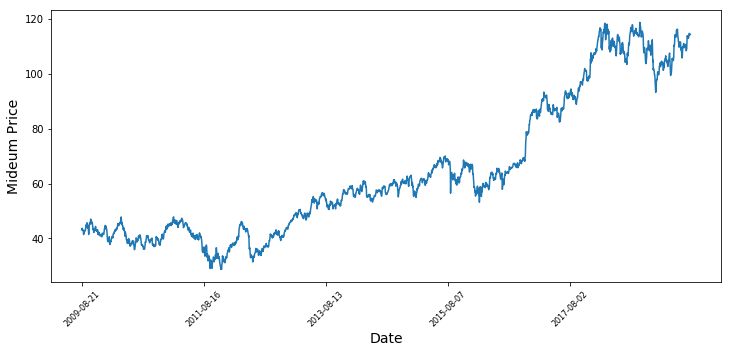

In [202]:
plt.figure(figsize = (12,5))
plt.plot(range(stock_data.shape[0]), (stock_data['Low'] + stock_data['High']) / 2.0)
plt.xticks(range(0, stock_data.shape[0], 500), stock_data['Date'].loc[::500], rotation = 45, fontsize = 8)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Mideum Price',fontsize = 14)
plt.show()

In [203]:
# Index for train, validation and test
train_pct = 0.70
val_pct = 0.20
test_pct = 1 - train_pct - val_pct

print(int(train_pct * stock_data.shape[0]))
print(int(val_pct * stock_data.shape[0]))
print(int(test_pct * stock_data.shape[0]))



min_train_idx, max_train_idx = 0, int(stock_data.shape[0] * train_pct)
min_val_idx, max_val_idx = max_train_idx + 1, max_train_idx + int(stock_data.shape[0] * val_pct)
min_test_idx, max_test_idx = max_val_idx + 1,  stock_data.shape[0] 

1745
498
249


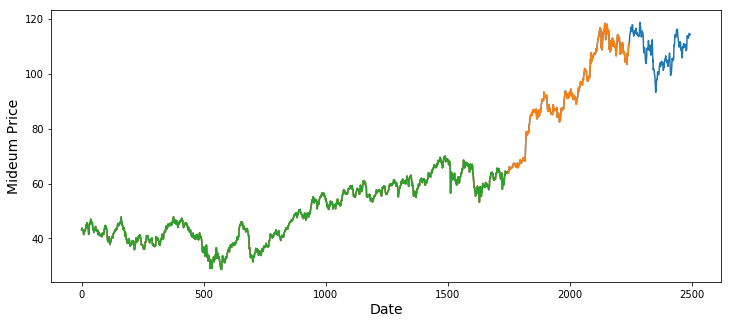

In [204]:
plt.figure(figsize = (12,5))
plt.plot(range(stock_data[min_train_idx:max_test_idx].shape[0]), (stock_data['Low'][min_train_idx:max_test_idx] + stock_data['High'][min_train_idx:max_test_idx]) / 2.0)
plt.plot(range(stock_data[min_train_idx:max_val_idx].shape[0]), (stock_data['Low'][min_train_idx:max_val_idx] + stock_data['High'][min_train_idx:max_val_idx]) / 2.0)
plt.plot(range(stock_data[min_train_idx:max_train_idx].shape[0]), (stock_data['Low'][min_train_idx:max_train_idx] + stock_data['High'][min_train_idx:max_train_idx]) / 2.0)
#plt.xticks(range(0, stock_data.shape[0], 500), stock_data['Date'].loc[::500], rotation = 45, fontsize = 8)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Mideum Price',fontsize = 14)
plt.show()

In [205]:
def normalize_data(df, input_list, target):
    '''Min-Max Scaler normalization function'''
    temp = df.copy()
    for feat in input_list:
        min_max_scaler = sklearn.preprocessing.MinMaxScaler()
        temp[feat] = min_max_scaler.fit_transform(temp[feat].values.reshape(-1,1))
        if feat == target:
            print('Saving Scaler Parameters...')
            scaler = min_max_scaler
    return temp, scaler

In [206]:
input_list = ['Open','High','Low','Close', 'Adj Close', 'Volume', 'vd_5','vd_10','vd_20','vd_40','vd_80','vd_160','ma_5','ma_10','ma_20','ma_40','ma_80','ma_160']
stock_data_normalized, scaler = normalize_data(stock_data, input_list = input_list, target = 'Close')

Saving Scaler Parameters...


In [207]:
stock_data.head()

Date   Open   High    Low  Close  Adj Close    Volume  Open/Close  \
160  2009-08-21 42.860 43.810 42.530 43.660     34.321  42863600       0.982   
161  2009-08-24 43.860 44.240 42.950 43.010     33.810  40385200       1.020   
162  2009-08-25 43.390 44.140 43.300 43.580     34.258  34835700       0.996   
163  2009-08-26 43.390 43.780 42.920 43.300     34.038  31908400       1.002   
164  2009-08-27 43.050 43.630 42.540 43.450     34.156  28975700       0.991   

             vd_5           vd_10          vd_20           vd_40  \
160 4,449,700.000 -22,832,400.000  7,535,000.000 -14,342,100.000   
161 1,222,400.000  -3,315,400.000  9,905,900.000  -6,337,300.000   
162 5,782,100.000 -15,863,100.000  5,799,800.000     -79,100.000   
163 2,514,300.000 -11,168,700.000  1,977,000.000  -7,562,200.000   
164  -658,600.000 -11,409,600.000 -9,555,300.000  -7,488,000.000   

              vd_80          vd_160   ma_5  ma_10  ma_20  ma_40  ma_80  ma_160  
160 -41,867,700.000  10,368,700.000 41.984 42.141 40.861 37.900 36.430  31.118  
161 -54,171,700.000  -3,684,200.000 42.440 42.173 41.105 38.114 36.555  31.204  
162 -33,418,400.000  -9,380,600.000 42.816 42.407 41.380 38.339 36.693  31.290  
163 -69,010,000.000 -10,248,100.000 43.194 42.516 41.656 38.568 36.787  31.385  
164 -34,512,500.000 -23,100,100.000 43.400 42.571 41.905 38.810 36.895  31.486

In [208]:
stock_data_normalized.tail()

Date  Open  High   Low  Close  Adj Close  Volume  Open/Close  \
2649  2019-07-15 0.960 0.958 0.950  0.946      0.985   0.043       1.014   
2650  2019-07-16 0.938 0.958 0.943  0.960      0.998   0.062       0.986   
2651  2019-07-17 0.948 0.951 0.952  0.947      0.986   0.044       1.004   
2652  2019-07-18 0.943 0.953 0.950  0.955      0.993   0.027       0.994   
2653  2019-07-19 0.953 0.953 0.948  0.942      0.981   0.031       1.012   

      vd_5  vd_10  vd_20  vd_40  vd_80  vd_160  ma_5  ma_10  ma_20  ma_40  \
2649 0.439  0.474  0.530  0.544  0.552   0.568 0.960  0.966  0.951  0.941   
2650 0.445  0.508  0.545  0.556  0.550   0.607 0.964  0.968  0.955  0.943   
2651 0.432  0.504  0.524  0.548  0.508   0.608 0.967  0.968  0.957  0.943   
2652 0.413  0.503  0.507  0.539  0.526   0.572 0.968  0.970  0.960  0.944   
2653 0.419  0.503  0.508  0.542  0.542   0.590 0.964  0.970  0.962  0.945   

      ma_80  ma_160  
2649  0.960   0.930  
2650  0.962   0.930  
2651  0.964   0.931  
2652  0.967   0.931  
2653  0.969   0.932

In [209]:
def conver_to_array(df, list_features, target):
    '''Convert a dataframe into a numpy array to train the model'''
    temp = df[target + list_features]
    float_data = temp.as_matrix()
    return float_data

In [212]:
float_data = conver_to_array(stock_data_normalized, list_features = input_list, target = ['Close'])
print(float_data)

[[0.16904526 0.16076146 0.16274946 ... 0.0705954  0.05254152 0.        ]
 [0.16185418 0.17176498 0.16751666 ... 0.07316217 0.05408886 0.00106159]
 [0.16816023 0.1665933  0.16640798 ... 0.07585489 0.05580314 0.00211856]
 ...
 [0.94711805 0.94828348 0.95133038 ... 0.94336596 0.96418861 0.93084754]
 [0.95464101 0.94278172 0.9527716  ... 0.94424754 0.96662169 0.93126493]
 [0.94213966 0.95334509 0.95332595 ... 0.94506315 0.96872706 0.93155964]]


In [213]:
float_data[-1, 1]

0.9533450908894727

In [225]:
n_inputs = 30
train_generator = TimeseriesGenerator(float_data, float_data[:,0], start_index = 0, end_index = max_train_idx, length = n_inputs, batch_size = 16)
val_generator = TimeseriesGenerator(float_data, float_data[:,0], start_index = min_val_idx - n_inputs , end_index = max_val_idx, length = n_inputs, batch_size = 1)
val_steps = len(val_generator)

In [226]:
print(float_data[:10])

[[0.16904526 0.16076146 0.16274946 0.16269532 0.16904526 0.12327158
  0.18343163 0.43377563 0.4364795  0.54068035 0.49311347 0.44286563
  0.61930015 0.14875231 0.14372463 0.11581896 0.0705954  0.05254152
  0.        ]
 [0.16185418 0.17176498 0.16751666 0.16735011 0.16185418 0.11773976
  0.1718294  0.42371103 0.48790104 0.54786491 0.51636328 0.40920665
  0.57495382 0.15389648 0.14409265 0.11870276 0.07316217 0.05408886
  0.00106159]
 [0.16816023 0.1665933  0.16640798 0.17122907 0.16816023 0.12259071
  0.14585032 0.43793083 0.45484155 0.53542216 0.53454013 0.46597964
  0.55697785 0.15813817 0.14678382 0.12195295 0.07585489 0.05580314
  0.00211856]
 [0.16506251 0.1665933  0.16241685 0.1670176  0.16506251 0.12020758
  0.13214665 0.42773993 0.46720991 0.52383791 0.51280558 0.36861481
  0.55424031 0.16240242 0.1480374  0.12522087 0.07861058 0.05696403
  0.00329202]
 [0.16672201 0.16285211 0.1607539  0.16280617 0.16672201 0.12148437
  0.11841769 0.41784497 0.46657521 0.4888915  0.51302109 0.4

In [227]:
sample, target = val_generator[0]

In [228]:
sample

array([[[0.37437773, 0.36531692, 0.36773835, 0.36628617, 0.37437773,
         0.36812364, 0.06137794, 0.43852742, 0.51284906, 0.4959806 ,
         0.54115044, 0.51641641, 0.61169687, 0.38218042, 0.39323297,
         0.39285313, 0.3771005 , 0.3623757 , 0.38208793],
        [0.3750415 , 0.3746699 , 0.3722838 , 0.37770142, 0.3750415 ,
         0.36871797, 0.05651076, 0.41700826, 0.48475309, 0.51686305,
         0.535803  , 0.53056692, 0.57960433, 0.37866072, 0.3905188 ,
         0.39219718, 0.37670469, 0.36332482, 0.3818395 ],
        [0.37603718, 0.38732397, 0.38492237, 0.38224536, 0.37603718,
         0.36960968, 0.03994678, 0.41334454, 0.49405334, 0.51891124,
         0.53409748, 0.55121669, 0.5848743 , 0.37663012, 0.38717209,
         0.39152351, 0.37622491, 0.36415336, 0.38162039],
        [0.38245384, 0.37940142, 0.37549889, 0.3800288 , 0.38245384,
         0.37535568, 0.03713049, 0.39526923, 0.50108221, 0.52470791,
         0.53745478, 0.53186004, 0.57357921, 0.37859303, 0.38474543

In [229]:
sample[:, -1, 0]

array([0.39517646])

In [230]:
target

array([0.39373828])

In [231]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = (val_generator[step])
        preds = samples[:, -1, 0]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return (np.mean(batch_maes))
    

mean_absolute_error = evaluate_naive_method()
print(mean_absolute_error)

0.008611500400918959


In [232]:
for i in range(len(val_generator)):
    print(val_generator[i])

(array([[[0.37437773, 0.36531692, 0.36773835, 0.36628617, 0.37437773,
         0.36812364, 0.06137794, 0.43852742, 0.51284906, 0.4959806 ,
         0.54115044, 0.51641641, 0.61169687, 0.38218042, 0.39323297,
         0.39285313, 0.3771005 , 0.3623757 , 0.38208793],
        [0.3750415 , 0.3746699 , 0.3722838 , 0.37770142, 0.3750415 ,
         0.36871797, 0.05651076, 0.41700826, 0.48475309, 0.51686305,
         0.535803  , 0.53056692, 0.57960433, 0.37866072, 0.3905188 ,
         0.39219718, 0.37670469, 0.36332482, 0.3818395 ],
        [0.37603718, 0.38732397, 0.38492237, 0.38224536, 0.37603718,
         0.36960968, 0.03994678, 0.41334454, 0.49405334, 0.51891124,
         0.53409748, 0.55121669, 0.5848743 , 0.37663012, 0.38717209,
         0.39152351, 0.37622491, 0.36415336, 0.38162039],
        [0.38245384, 0.37940142, 0.37549889, 0.3800288 , 0.38245384,
         0.37535568, 0.03713049, 0.39526923, 0.50108221, 0.52470791,
         0.53745478, 0.53186004, 0.57357921, 0.37859303, 0.3847454

In [235]:
std = stock_data['Close'][:max_train_idx].std(axis = 0)
print(std)

10.424630893745967


In [234]:


model = Sequential()
model.add(Bidirectional(LSTM(32, activation = 'relu', dropout = 0.0, recurrent_dropout = 0.0, return_sequences = True), input_shape = (None, float_data.shape[-1])))
model.add(Bidirectional(LSTM(8, activation = 'relu', dropout = 0.0, recurrent_dropout = 0.0)))
model.add(layers.Dense(1))

model.compile(optimizer = Adam(lr = 0.005, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.001, amsgrad = False), loss = 'mae')

history = model.fit_generator(train_generator,
                              steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_generator,
                              validation_steps = len(val_generator))

Epoch 1/20
500/500 [==============================] - 233s 466ms/step - loss: 0.0383 - val_loss: 0.1725
Epoch 2/20
500/500 [==============================] - 185s 370ms/step - loss: 0.0239 - val_loss: 0.1294
Epoch 3/20
500/500 [==============================] - 257s 513ms/step - loss: 0.0157 - val_loss: 0.1084
Epoch 4/20
500/500 [==============================] - 282s 565ms/step - loss: 0.0131 - val_loss: 0.0585
Epoch 5/20
500/500 [==============================] - 225s 450ms/step - loss: 0.0111 - val_loss: 0.0435
Epoch 6/20
500/500 [==============================] - 204s 408ms/step - loss: 0.0097 - val_loss: 0.0517
Epoch 7/20
500/500 [==============================] - 206s 412ms/step - loss: 0.0096 - val_loss: 0.0116
Epoch 8/20
500/500 [==============================] - 281s 563ms/step - loss: 0.0088 - val_loss: 0.0152
Epoch 9/20
500/500 [==============================] - 284s 567ms/step - loss: 0.0086 - val_loss: 0.0223
Epoch 10/20
500/500 [==============================] - 211s 422m